# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Профильное задание №1 для направления "физика"

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **15 мая в 23:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----



# Задача 1 Оптимизационная

Физики из города Долгопрудный купили сверхточный термометр и датчик давления для исследования разреженных газов. В сосуд с изменяемым объемом они закачали некоторое количество одноатомного газа, причем он оказался достаточно разреженным. Затем они изменяли температуру данного сосуда и измеряли давление, причём теплоемкость газа в данном процессе можно считать постоянной. Значения, полученные в ходе эксперимента, они записывали в этот [файл](https://drive.google.com/file/d/1vg3fFktL01uqXNjUFRxlDdYWOyHOjDJL/view?usp=sharing). Постройте оценку теплоёмкости данного газа с как можно меньшей погрешностью. 

Оценка должна быть "адекватной" (константа не подойдет :) ). Понятие адекватности определяйте сами.

*Указание 1: для процессов с постоянной теплоёмкостью зависимость давления от температуры имеет вид $P \propto T^{\alpha}$, где $\alpha$ &mdash; любое число.*

*Указание 2: Может быть полезным для уменьшения погрешности усреднять давление в некотором диапазоне температур.*




<AxesSubplot:xlabel='P', ylabel='T'>

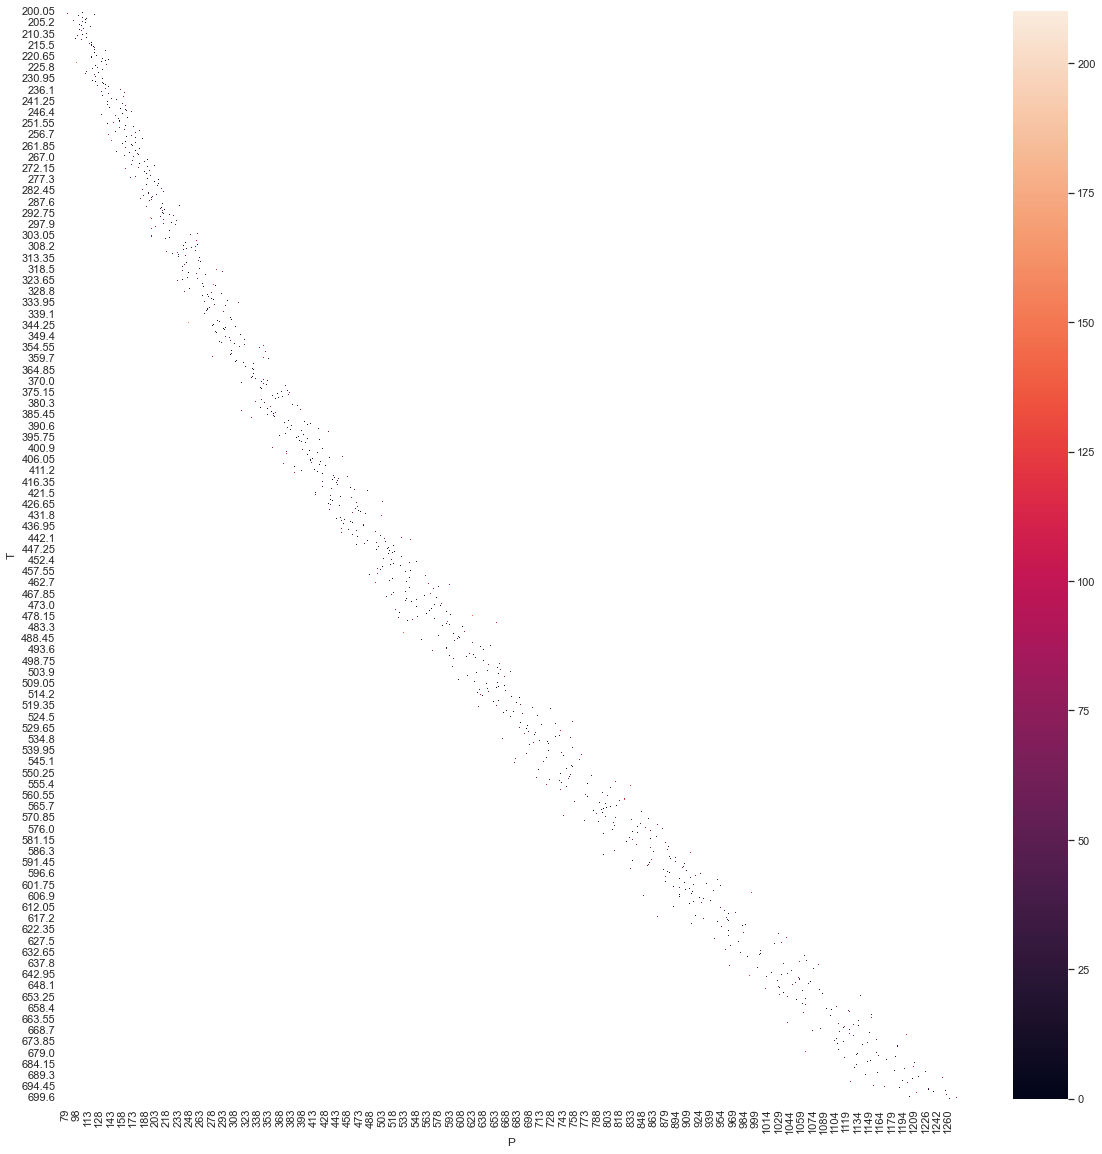

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white')

plt.figure(figsize=(20, 20))

R = 8.31
data = pd.read_csv('task1.csv', sep=';')
data['C'] = data['T']
data.at[0, 'C'] = 0
it = 0
for i in data['C']:
    if it != 0:
        mean_P = (data['P'][it] + data['P'][it - 1]) / 2
        delta_T = abs(data['T'][it] - data['T'][it - 1])
        delta_V = R * abs(data['T'][it] / data['P'][it] - data['T'][it - 1] / data['P'][it - 1])
        data.at[it, 'C'] = (1.5 * R + mean_P * delta_V / delta_T) / 100
    it += 1
table = pd.pivot_table(data, values='C', index=['T'], columns=['P'])
sns.heatmap(table)

# Задача 2
В сфере статистики экзопланет ныне бытует мнение, что чем выше металличность звезды, тем выше вероятность того, что у нее будет планета гигант. Рассмотрим [часть выгрузки](https://drive.google.com/file/d/1PTc_AXsRogXQj_4paxbWWqxX5NWZJQoS/view) базы данных экзопланетного архива NASA и проверим, так ли это. Конечно, в реальном исследовании стоит учитывать неоднородность данных, но для начала нам будет достаточно и сырых данных.

Проверьте гипотезу с использованием критерия согласия хи-квадрат. 

*Замечание: в этой задаче у вас есть шанс поработать с настоящими "реальными" данными:)*


In [ ]:
import pandas as pd

data = pd.read_csv('data_set.csv', sep=';', engine='python', decimal=',')
data.iloc[:10, :9]
print('Let\'s set the H0 hypothesis as "There is no any relation"')

Let's set the H0 hypothesis as "There is no any relation"


In [ ]:
met = set(data['st_met'].to_list())
data1 = pd.DataFrame(columns=['gigant', 'not_gigant'])
for i in met:
    if str(i) == 'nan':
        continue
    data1.loc[str(i)] = [len(data.loc[(data['st_met'] == i) & (data['pl_bmassj'] > 1)].index), len(data.loc[(data['st_met'] == i) & (data['pl_bmassj'] <= 1)].index)]


data1['Total_in_row'] = data1.sum(axis=1)
data1.loc['Total_in_col'] = data1.sum()

tt = data1.loc['Total_in_col']
data1_exp = pd.DataFrame(columns=['gigant', 'not_gigant', 'Total_in_row'])
data1_exp = data1.apply(lambda x: [tt[0] * x[2] / tt[2], tt[1] * x[2] / tt[2], x[2]], axis=1, result_type='expand')

degree_of_freedom = (len(data1.index) - 2)
print(f'Degree of freedom is equal to {degree_of_freedom}')
p_val = 0.01
print(f'p-value is equal to {p_val}')
critical_val = 106.582
print(f'Critical value of Chi-square is equal to {critical_val}')

calc_val = 0.0
for i in met:
    if str(i) == 'nan':
        continue
    calc_val += ((data1.loc[str(i)][0] - data1_exp.loc[str(i)][0]) ** 2) / (data1_exp.loc[str(i)][0])
    calc_val += ((data1.loc[str(i)][1] - data1_exp.loc[str(i)][1]) ** 2) / (data1_exp.loc[str(i)][1])
print(f'Calculated value of Chi-square is equal to {calc_val}')
print(f'Critical vlaue({critical_val}) >= than calculated value({calc_val}), so this means that H0 hypothesis is true')
print('So there is no relation between st_met and pl_bmassj')

Degree of freedom is equal to 76
p-value is equal to 0.01
Critical value of Chi-square is equal to 106.582
Calculated value of Chi-square is equal to 100.71097883597878
Critical vlaue(106.582) >= than calculated value(100.71097883597878), so this means that H0 hypothesis is true
So there is no relation between st_met and pl_bmassj
